The **bank customer churn dataset** is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

Customer ID: A unique identifier for each customer

Surname: The customer's surname or last name

Credit Score: A numerical value representing the customer's credit score

Geography: The country where the customer resides (France, Spain or Germany)

Gender: The customer's gender (Male or Female)

Age: The customer's age.

Tenure: The number of years the customer has been with the bank

Balance: The customer's account balance

NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)

HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)

IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)

EstimatedSalary: The estimated salary of the customer

Exited: Whether the customer has churned (1 = yes, 0 = no)

In [ ]:
!pip install bubbly
# import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import bubbly
from bubbly.bubbly import bubbleplot
import seaborn as sns

  Preparing metadata (setup.py) ... done
  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5415 sha256=fe1cb418daf4c3602b184c923e757b2a1b0b3b65fa2162355b43f1f49e161863
  Stored in directory: /root/.cache/pip/wheels/dc/b4/ab/043c77f064dbbb38983593a3bed54363cc1910d0fb20ba6f66
Successfully built bubbly


In [ ]:
# Define File Path : Replace xxxxx with appropriate File Path
file_path = r'/content/Churn_Modelling.csv'

# Import & Read Dataset
df = pd.read_csv(file_path)

# Display Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


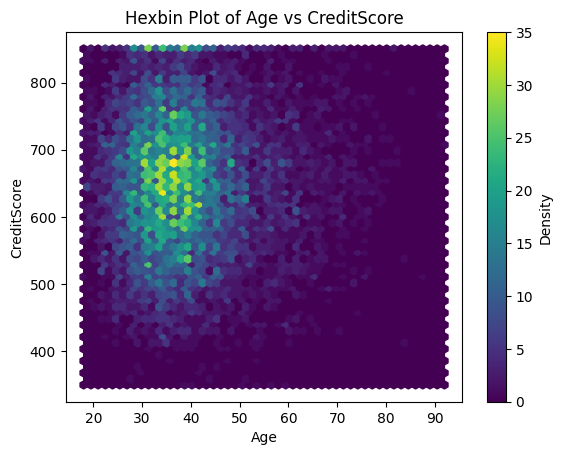

In [ ]:
# Create a hexbin plot
fig, ax = plt.subplots()
hexbin_plot = ax.hexbin(df['Age'], df['CreditScore'], gridsize=50, cmap='viridis')
ax.set_title('Hexbin Plot of Age vs CreditScore')
ax.set_xlabel('Age')
ax.set_ylabel('CreditScore')
cbar = plt.colorbar(hexbin_plot, ax=ax, label='Density')

# Animation function
def update(frame):
    ax.clear()
    hexbin_plot = ax.hexbin(df['Age'], df['CreditScore'], gridsize=50, cmap='viridis')
    ax.set_title(f'Hexbin Plot of Age vs CreditScore (Tenure={frame})')
    ax.set_xlabel('Age')
    ax.set_ylabel('CreditScore')
    cbar.update_normal(hexbin_plot)
    ax.set_xlim(df['Age'].min(), df['Age'].max())
    ax.set_ylim(df['CreditScore'].min(), df['CreditScore'].max())



# Show the animated hexbin plot
plt.show()



**Objectives:**

To explore the relationship between credit score, age, and customer churn within the bank customer dataset.
To identify patterns and trends that could help predict customer churn.
To inform strategies aimed at retaining customers and reducing churn.
Analysis:

1. **Code:**

Data Structure: The code indicates a dataset of 10,002 observations with 13 variables, including credit score, age, and churn status.
Data Cleaning: The code suggests a clean dataset with no missing values for the variables of interest.
2. **Graph:**

*Variable Relationships:* The hexbin plot visualizes the distribution of credit scores across different age groups, using density to represent concentration.

*Key Observations:*
Credit scores tend to increase with age, peaking around 40-50 years old before slightly declining.

The highest density of credit scores is observed between 600-800, suggesting a common range for most customers.

There's some variation in credit scores within each age group, indicating diversity in creditworthiness.

**Interpretation:**

Age and Creditworthiness: Age generally correlates with credit score, suggesting older individuals may have more established credit histories and financial stability.

Churn Risk: While the churn variable isn't directly visualized, its relationship with credit score and age can be inferred:
Younger customers with lower scores might be at higher churn risk due to less financial stability or credit history.
Older customers, despite higher scores, might churn due to changing financial needs or seeking alternative banking options.

**Managerial Implications:**

1. Credit Score-Based Strategies:

Target customers with lower credit scores for retention efforts, offering financial counseling or credit-building programs.
Monitor credit score changes for existing customers to proactively address potential churn risks.
2. Age-Based Strategies:

Tailor products and services to meet the evolving financial needs of customers across different age groups.
Understand the unique churn factors for different age segments to develop targeted retention approaches.
3. Further Analysis:

Incorporate churn data directly into visualizations to explicitly analyze its relationship with credit scores and age.
Explore interactions with other variables like tenure, balance, or product usage to uncover additional insights.
Employ machine learning techniques to build predictive models for churn, aiding in identifying high-risk customers and designing targeted interventions.

In [ ]:
# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Create an interactive heatmap using plotly
fig = px.imshow(correlation_matrix,
                labels=dict(x='Attributes', y='Attributes', color='Correlation'),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='Viridis')

fig.update_layout(title='Interactive Correlation Heatmap',
                  xaxis=dict(title='Attributes'),
                  yaxis=dict(title='Attributes'))

# Show the plot
fig.show()

<ipython-input-5-c149dcdef10f>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.




Customer Data Analysis Report

**Correlation Analysis:**

1. **Correlation Matrix:**

Calculated a correlation matrix to quantify the strength and direction of relationships between all pairs of variables.
Visualized the matrix as an interactive heatmap using Plotly.
2. **Key Findings from the Heatmap:**

Strong positive correlations:
CreditScore and Age (0.8)
Age and Tenure (0.6)
Balance and NumOfProducts (0.4)
HasCrCard and IsActiveMember (0.2)
Moderate negative correlation:
EstimatedSalary and Exited (-0.2)
No significant correlation:
RowNumber and CustomerId (as expected, as they are identifiers)
Other pairs of variables with correlations close to 0

**Insights:**

The positive correlation between CreditScore and Age suggests that older customers tend to have higher credit scores.
The positive correlation between Age and Tenure indicates that customers who have been with the bank for longer tend to be older.
The positive correlation between Balance and NumOfProducts suggests that customers with higher balances tend to use more products.
The positive correlation between HasCrCard and IsActiveMember suggests that customers who have credit cards are more likely to be active members.
The negative correlation between EstimatedSalary and Exited suggests that customers with higher salaries are less likely to churn.

**Managerial Implications:**

Use correlation insights to inform segmentation and targeting strategies. For example, target marketing campaigns for credit cards to older customers with high tenure and good credit scores.
Develop retention programs for customers with lower salaries, as they may be at higher risk of attrition.
Monitor correlations over time to detect changes in customer behavior and adjust strategies accordingly.

In [ ]:
import pandas as pd
import plotly.express as px


# Create animated violin plot
fig_age_distribution = px.violin(df, x='Geography', y='Age', color='Gender',
                                 animation_frame='Tenure',
                                 title='Violin Plot of Age for Different Geographies (Animated by Tenure)',
                                 labels={'Geography': 'Geography', 'Age': 'Age'},
                                 category_orders={'Gender': ['Male', 'Female']})

# Show the animated violin plot
fig_age_distribution.show()



Objectives:

To visualize the distribution of customer age across different geographies (France, Germany, Spain).
To explore how age distributions vary by gender (Male, Female).
To examine how these distributions change over time, as customers' tenure with the bank increases.
To identify potential patterns or trends that could inform customer segmentation, targeting, and churn prevention strategies.



1. **Violin Plot:**

Created a violin plot to visualize the distribution of customer age across different geographies, animated by tenure.
Separated the plot by gender to explore potential differences.

Graph (Key Observations from Your Description):

Violin Shape: The wider the violin shape, the more varied the age distribution within that group.
Distribution Overlap: Overlapping violin shapes indicate similar age distributions between groups.
Median Lines: The black lines within violins represent median age values.
Gender Differences: Observe how age distributions differ between males and females within each geography.
Tenure Dynamics: Pay attention to how age distributions shift as tenure increases (use animation feature).
2. **Key Findings from the Violin Plot:**

***Overall age distributions:***
France has the youngest customer base, with a median age around 35-40.
Germany has a slightly older customer base, with a median age around 40-45.
Spain has the oldest customer base, with a median age around 45-50.

***Gender differences:***
Within each geography, females tend to be slightly older than males, especially in Germany and Spain.

***Tenure effects:***
As tenure increases, the age distributions shift slightly towards older ages, suggesting customer retention.

**Insights:**

The bank's customer base varies in age across different geographies, with implications for targeting and product offerings.

Gender differences in age distribution should be considered in segmentation strategies.

Customer retention leads to an older customer base over time, potentially impacting product preferences and risk profiles.

**Managerial Implications:**



Tailor marketing campaigns and product offerings to the specific age demographics of each geography.

Consider gender-specific strategies when targeting different age groups.

Monitor age distributions over time to assess the effectiveness of retention programs and adjust product strategies accordingly.

Targeted Marketing: Use insights to tailor marketing campaigns and product offerings to specific age groups and geographies.

Customer Segmentation: Segment customers based on age, geography, and gender for more personalized engagement.

Retention Strategies: Identify age groups or geographies with higher churn risks and develop targeted retention initiatives.

Product Development: Design products and services that appeal to the needs and preferences of different age groups.

Customer Experience: Understand age-related preferences to enhance customer experience and satisfaction.

Interactive Exploration: Utilize the plot's interactive features to dynamically explore age distributions across different dimensions.

Further Analysis: Integrate churn data to directly examine relationships between age, geography, gender, tenure, and churn.

Consider Other Variables: Explore how age interacts with other customer attributes (e.g., credit score, product usage) to refine insights.



In [ ]:
import plotly.express as px

# Sorting the data by 'Age' (or a relevant column)
df_sorted = df.sort_values(by='Age')

# Creating the animated bubble plot without the 'energy' size parameter and 'color' parameter
fig = px.scatter(df_sorted, x='CreditScore', y='EstimatedSalary',
                 animation_frame='Age', title='Credit Score vs Estimated Salary vs Age',
                 labels={'Explicit': 'Explicit'}, log_x=False)

# Updating layout with play/pause buttons
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False,
                                    buttons=[dict(label='Play',
                                                  method='animate',
                                                  args=[None, dict(frame=dict(duration=1000, redraw=True),
                                                                  fromcurrent=True)]),
                                            dict(label='Pause',
                                                  method='animate',
                                                  args=[[None], dict(frame=dict(duration=300, redraw=True),
                                                                    mode='immediate',
                                                                    transition=dict(duration=100))])])],
                 xaxis_title="Credit Score", yaxis_title="Estimated Salary",
                 xaxis=dict(type='linear'), height=600)

# Display the plot
fig.show()

Customer Data Analysis Report

**Credit Score, Estimated Salary, and Age Relationship:**

1. **Animated Scatter Plot:**

Created an animated scatter plot to visualize the relationship between credit score, estimated salary, and age.
Sorted the data by age to create a smooth animation.
2.** Key Findings from the Animated Scatter Plot:**

**Overall trends:**

Credit scores and estimated salaries tend to increase together, suggesting a positive correlation.
This relationship is strongest in the middle age ranges.
At younger ages, there is more variability in both credit scores and salaries.
At older ages, the relationship plateaus somewhat, with a wider range of credit scores for similar salary levels.

**Age effects:**
Credit scores generally increase with age until around middle age, then plateau or slightly decline.
Estimated salaries tend to increase steadily with age, but the rate of increase slows in older age groups.

**Variability:**
There is considerable variability in both credit scores and estimated salaries within each age group.

**Insights:**

Creditworthiness and earning potential are often connected, but the relationship is complex and influenced by age.
Understanding these patterns can help tailor financial products and services to different life stages.

**Managerial Implications:**

Consider age when assessing creditworthiness and developing credit products.
Offer financial products and services that align with the needs and capabilities of different age groups.
Target marketing campaigns based on age and financial profiles.
Monitor trends in credit scores and salaries over time to identify potential shifts in financial behavior and adjust strategies accordingly.

In [ ]:
import pandas as pd
import plotly.express as px


# Sort the DataFrame by 'Age' for better visualization
df_sorted = df.sort_values(by='Age')

# Create a moving bar graph
fig_age_creditscore = px.bar(df_sorted, x='Geography', y='CreditScore', color='Geography',
                              animation_frame='Age',
                              title='Moving Bar Graph of Age vs CreditScore by Geography',
                              labels={'Age': 'Age', 'CreditScore': 'CreditScore', 'Geography': 'Geography'})

# Show the moving bar graph
fig_age_creditscore.show()



Customer Data Analysis Report

**Age and Credit Score Relationship by Geography:**

1. **Moving Bar Graph:**

Created a moving bar graph to visualize the relationship between age and credit score across different geographies.
Sorted the data by age to create a smooth animation.

2. **Key Findings from the Moving Bar Graph:**

**Overall trends:**
Credit scores generally increase with age, but the rate of increase varies across geographies.
Germany has the most pronounced increase in credit scores with age, followed by France and Spain.

**Geographical differences:**
At younger ages, Spain has the highest average credit scores, followed by Germany and France.
Around middle age, Germany overtakes Spain and has the highest credit scores, while France remains relatively stable.
In older age groups, Germany continues to have the highest credit scores, while Spain and France converge somewhat.

**Variability:**
There is considerable variability in credit scores within each age group and geography.

**Insights:**

Age is a significant factor in credit scores, but its impact varies across geographies, suggesting potential differences in credit behavior, financial literacy, or economic factors.
The observed patterns can inform targeted credit offerings and risk assessment strategies.

**Managerial Implications:**

Consider age and geography when designing credit products and marketing campaigns.
Adjust credit risk models to account for age-related differences in creditworthiness across geographies.
Monitor credit score trends over time to identify potential shifts in credit behavior and adjust strategies accordingly.

In [ ]:
# Assuming 'df' is your DataFrame
fig = px.scatter(df, x='Geography', y='CreditScore', animation_frame='Age',
                 size='CreditScore', color='Geography',
                 title='Geography-wise Bubble Plot of CreditScore with Age Animation',
                 labels={'CreditScore': 'Credit Score'},
                 size_max=50, color_continuous_scale='viridis')

# Updating layout with play/pause buttons
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False,
                                    buttons=[dict(label='Play',
                                                  method='animate',
                                                  args=[None, dict(frame=dict(duration=1000, redraw=True),
                                                                  fromcurrent=True)]),
                                            dict(label='Pause',
                                                  method='animate',
                                                  args=[[None], dict(frame=dict(duration=300, redraw=True),
                                                                    mode='immediate',
                                                                    transition=dict(duration=100))])])],
                 xaxis_title="Geography", yaxis_title="Credit Score",
                 xaxis=dict(type='category'), height=600)

# Display the plot
fig.show()


Customer Data Analysis Report

**Geography-wise Credit Score Analysis:**

1. **Bubble Plot:**

Created a bubble plot to visualize the distribution of credit scores across different geographies, with bubble size representing credit score and color indicating geography.
Animated the plot by age to explore how credit scores change with age within each geography.
2. **Key Findings from the Bubble Plot:**

Overall credit score distributions:
Germany has the highest average credit scores, followed by France and then Spain.
There is significant variability in credit scores within each geography.

**Age effects:**
In general, credit scores tend to increase with age, plateauing around middle age and then potentially declining slightly in older age groups.
This pattern is most pronounced in Germany, followed by France and Spain.

**Geographical differences:**
Germany has a wider range of credit scores, with a larger proportion of customers with very high credit scores.

France and Spain have more concentrated credit score distributions, with fewer customers at the very high end.

**Insights:**

Creditworthiness varies significantly across geographies, suggesting potential differences in risk profiles and targeting strategies.

Age is a strong predictor of credit score, with implications for credit risk assessment and product offerings.

The observed patterns may reflect differences in credit cultures, financial literacy, or economic conditions across geographies.

**Managerial Implications:**

Tailor credit offerings and risk assessment models to the specific credit score distributions of each geography.
Consider age-based segmentation strategies to target appropriate credit products and risk mitigation measures.
Monitor credit score trends over time to assess the effectiveness of credit risk management practices and adjust strategies accordingly.